# <font color = "blue"> Modelo de Classificação binário</font>

Versão Python:

In [1]:
from platform import python_version
print("Python versão", python_version())

Python versão 3.9.13


Librarias e funções:

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import statsmodels
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

## 1. Desafio e Quadro Geral

## 1.1 Definição do desafio: 

- Usam-se o conjunto de dados **MNIST**, que consiste em $70.000$ imagens pequenas de dígitos escritos à mão por estudantes do ensino médio e funcionários do *US Census Bureau*. Cada imagem é rotulada com o dígito que representa. 

- Este conjunto de dados foi estudado tanto que é frequentemente chamado de "hello world" do aprendizado de máquina: sempre que as pessoas desenvolvem um novo algoritmo de classificação, elas estão curiosas para ver como ele se sairá no MNIST, e qualquer pessoa que aprenda aprendizado de máquina aborda esse conjunto de dados mais cedo ou mais tarde.

## 1.2 Quadro Geral: 

- Como se espera usar e se beneficiar desse modelo? A saída do modelo será a classificação das imagens. O resultado permite a avaliação do conhecimento do cientísta de dados iniciante e não alimenta outros sistema.

- Como é a solução atual (se houver)? Não existe uma solução atual entregada. No entanto, parece que abordagem tradicional implica muitos ajustes finos e complexos, o número de dados pode supor uma abordagem como Machine Learning.

## 1.3 Sistema, tarefa e ténica de ML

- Qual tipo de supervisão de treinamento será necessário para o modelo? Será necessário um sistema de *ML* supervisionado, uma vez que cada imagem é rotulada com o dígito que representa.

- Qual será a tarefa desempenhada pelo modelo? A tarefa é de classificação das imagens.

- Deve-se utilizar técnicas de aprendizado em lote ou em tempo real? Em lotes dado que o rótulo dos dígito não mudam rapidamente.

## 2. Obter dados

In [3]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', as_frame=False)

In [4]:
X, y = mnist.data, mnist.target

In [5]:
X.shape

(70000, 784)

In [6]:
y.shape

(70000,)

In [7]:
nome_recurse = mnist.feature_names
nome_target = mnist.target_names

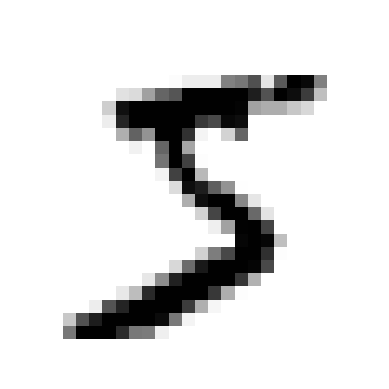

In [8]:
# Visualização de um registro
def plot_digit(image_data):
    image = image_data.reshape(28, 28)
    plt.imshow(image, cmap="binary")
    plt.axis("off")
some_digit = X[0]
plot_digit(some_digit)
plt.show()

In [9]:
y[0]

'5'

- Observe que o número é o $5$.

## 3. Conjunto Treinamento e Teste

In [10]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

> **A continuação se apresentam as métricas para uma classificação binária**. Se considera o caso `True` se for $5$ ou `False` caso contrário.

### 3.1 Treinando uma classificação binária

In [11]:
# True se for '5' ou False c.c
y_train_5 = (y_train == '5')
y_test_5 = (y_test == '5')

In [12]:
# ajusta-se o modelo Stochastic Gradient Descent - SGD
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [13]:
sgd_clf.predict([some_digit]) # some_digit representa o digito `5`

array([ True])

In [14]:
# desequilibrado: prevalência do "False" em um 90.96% dos dados.
pd.DataFrame(y_train_5).value_counts() / (54579 + 5421)

False    0.90965
True     0.09035
dtype: float64

### 3.2 Medindo a Precisão Geral  usando Cross-Validation


O resultado mostra uma Precisão Geral maior ao $95\%$, no entanto, isso se deve a prêvalencia da classe `False` nos dados:

In [15]:
# precisão geral para 3-fold
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.95035, 0.96035, 0.9604 ])

Porém a precisão geral não é uma medida de desempenho preferível para classificar, especificamente quando os dados estão muito desequilibrados (i.e, uma classe tem uma maior prevalência).

### 3.3 Matrizes de Confusão

Assim como a função `cross_val_score()`, a função `cross_val_predict()` realiza a validação cruzada k-fold, mas em vez de retornar os escores de avaliação, ela retorna as previsões feitas em cada dobra da avaliação. Isso significa que você obtém uma previsão "limpa" para cada instância no conjunto de treinamento (por "limpa", quero dizer "fora da amostra": o modelo faz previsões em dados que nunca viu durante o treinamento).

In [16]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv = 3)

In [17]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train_5, y_train_pred)

In [18]:
cm

array([[53892,   687],
       [ 1891,  3530]], dtype=int64)

Cada linha em uma matriz de confusão representa uma classe real, enquanto cada coluna representa uma classe prevista. A primeira linha desta matriz considera as imagens não-5 (a classe negativa): 53.892 delas foram classificadas corretamente como não-5 (verdadeiros negativos), enquanto as 687 restantes foram erroneamente classificadas como 5 (falsos positivos, também chamados de erros do tipo I). A segunda linha considera as imagens de 5 (a classe positiva): 1.891 foram erroneamente classificadas como não-5 (falsos negativos, também chamados de erros do tipo II), enquanto as 3.530 restantes foram classificadas corretamente como 5 (verdadeiros positivos). Um classificador perfeito teria apenas verdadeiros positivos e verdadeiros negativos, portanto, sua matriz de confusão teria valores diferentes de zero apenas em sua diagonal principal (do canto superior esquerdo para o canto inferior direito).

In [19]:
# classificador perfeito (não no mundo real)
y_train_perfect_predictions = y_train_5 # finja que alcançamos a perfeição
confusion_matrix(y_train_5, y_train_perfect_predictions)


array([[54579,     0],
       [    0,  5421]], dtype=int64)

A matriz de confusão permite definições precisas de outras métricas de avaliação, normalmente possui quatro entradas. Logo, as formas de médidas de avaliação mais importantes são dadas por:

$$Sensiblidade = recall = TPR = P(\hat{Y} = 1 | Y = 1) = \frac{PT}{PT + FN}$$

$$Especificidade = TNR = 1 - FPR = P(\hat{Y} = 0 | Y = 0) = \frac{TN}{FP + TN}$$

$$Precisão = PPV = P(Y = 1 | \hat{Y} = 1) = \frac{PT}{PT + FP}$$

## 3. 4 Precisão e Recall

In [20]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_train_5, y_train_pred).round(2)


0.8370879772350012

In [21]:
recall_score(y_train_5, y_train_pred).round(2)

0.6511713705958311

Agora, nosso detector de "5" não parece tão impressionante quanto parecia quando analisamos sua precisão geral. Quando ele afirma que uma imagem representa um "5", ele está correto apenas 83,7% das vezes. Além disso, ele detecta apenas 65,1% dos "5"s.

## 3. 5 Função $F_1$: Precisão equilibrada e pontuação

- Esta é uma métrica preferida em relação a precisão geral, sendo a média harmônica de sensibilidade e precisão. 

- A função foi adaptada definindo um $\beta$ para representar a
importância da sensibilidade (recall) sobre a especificidade e esta dada por:

$$F_1 = \frac{1}{\frac{\beta}{1 + \beta ^ 2} \frac{1}{recall} + \frac{1}{1 + \beta ^ 2} \frac{1}{Precisão}}$$

- Por *default* $\beta = 1$, pois o conceito por trás disso se refere ao fato de que muitas vezes há erros que custam mais do que outros. Por exemplo, em um caso de homicídio criminal, tomar uma decisão com base em um *falso positivo* levaria à execução de uma pessoa inocente. Portanto, é mais importante maximizar a precisão do que a sensibilidade.

- Observe que $F_1$ aumenta quando *recall* e a *precisão* aumentam.


In [22]:
from sklearn.metrics import f1_score
f1_score(y_train_5, y_train_pred)

0.7325171197343846

Em alguns contextos, você se preocupa principalmente com a precisão, e em outros contextos, você se preocupa muito com o recall. Infelizmente, você não pode ter tudo: aumentar a precisão reduz o recall e vice-versa em um classificador. Isso é chamado de trade-off entre precisão e recall. Depende do tipo de erro que você quer assumir.

## A Compensação (trade-off) entre Precisão e Recall

- Como dito anteriormente a maximização de alguma das medidas depende do tipo de erro que você quer mnimizar. Maximizar a *recall* minimiza o erro tipo II (FN), maximizar a *precisão* minimiza o erro tipo I (FP). 

- Observe que pelas definições das métricas acima, o *recall* aumenta quando disminuie o número de *FN* (o que implica aumentar a *TN*). Por outra parte a percisão aumenta quando disminuiem os *FP* (o que implica aumentar *TP*).

- O anterior ajuda a entender que em geral quando se maximiza o *recall* dismunui a *precisão* devido a que o classificador está interessado em disminuir *FN* (erro tipo II) e não *FP* (erro tipo I). Mas quando aumenta a *precisão* disminuie sempre o *recall*, porque o classificador está interessado em disminuir *FP* (erro tipo I) e não *FN* (erro tipo II).

### <font color = "green"> O desafio é responder a pergunta: como decidir que limear (threshold) usar?

O Scikit-Learn não permite definir o limite diretamente, mas ele fornece acesso aos escores de decisão que são usados para fazer as previsões. Em vez de chamar o método `predict()` do classificador, você pode chamar o método `decision_function()`, que retorna um escore para cada instância, e então usa qualquer limite que desejar para fazer previsões com base nesses escores:

In [23]:
y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([2164.22030239])

In [24]:
threshold = 0
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([ True])

- O SGDClassifier usa o limear igual a 0 por padrão. 
- Considerando-se um limear igual a $3.000$ se tem o `False`, assim se tem que o *recall* disminuie. A imagem atualmente representa um $5$, e o classificador deteta isso quando o limear é $0$, mas falha quando o limear aumenta para $3.000$.

In [25]:
threshold = 3000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False])

Para resolver o desafio se faz:

- Usar a função `cross_val_predict(method = "desicion_function")` para obter os scores de todas as instâncias do conjunto de treinamento. Esses scores refletem a "pontuação" que cada classe recebe, indicando o quão bem a imagem se encaixa naquela classe específica, quando maior o score maior é a confiança da classe pertencer a classe positiva. 
- Com esses scores, usar a `precision_recall_curve()` para calcular a precisão e recall para todos os possíveis limeares (a função adiciona a última precisão de 0 e o último recall de 1, correspondentes para um linear infinito).
- Por último, use *Matplotlib* para plotar as funções da precisão e o recall dos valores limeares. 

In [26]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method="decision_function")

In [27]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

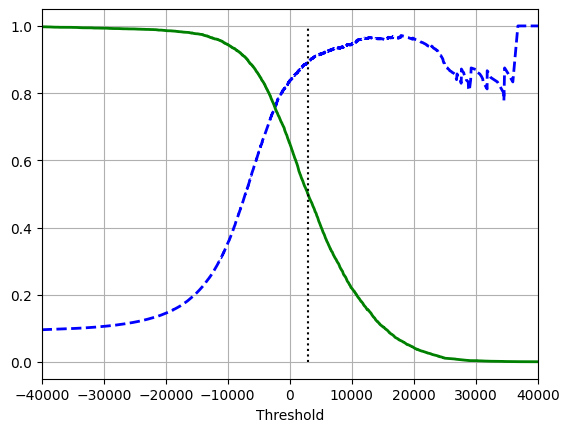

In [28]:
plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
plt.vlines(threshold, 0, 1.0, "k", "dotted", label="threshold")
plt.grid()
plt.xlabel("Threshold")
plt.xlim((-40000, 40000))
plt.show()


- Na figura acima se vê a precisão cerca de $90\%$ e o recall cerca de $50 \%$. 

- Outra maneira para selecionar uma boa compensação presição/recall é plotando a precisão e recall diretamente. 

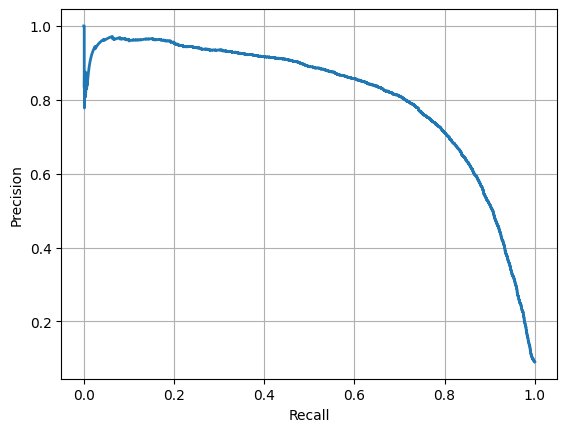

In [29]:
plt.plot(recalls, precisions, linewidth = 2, label = "Presicion/Recall curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.grid()
plt.show()

- Na figura acima, observe que a precisão começa a decair rápidamente alredor do $80\%$. Logo, se quer uma precisão de pelo menos esse valor, mas isso depende do projeto. 

- Suponha que você decida alcançar 90% de precisão. Você poderia usar o primeiro gráfico (precisão, recall e threshold) para encontrar o limiar que precisa usar, mas isso não é muito preciso. Como alternativa, você pode procurar pelo limiar mais baixo que lhe dê pelo menos 90% de precisão.

- Para isso, você pode usar o método argmax() de um array NumPy. Isso retorna o primeiro índice do valor máximo, o que neste caso significa o primeiro valor True:

In [30]:
index_precision_chosse = (precisions >= 0.90).argmax()


In [31]:
print("\n Precisão escolhida:", precisions[index_precision_chosse],
      "\n Recall escolhido:", recalls[index_precision_chosse],
      "\n Threshold:", thresholds[index_precision_chosse])


 Precisão escolhida: 0.9000345901072293 
 Recall escolhido: 0.4799852425751706 
 Threshold: 3370.0194991439557


- Logo, se podem fazer previsões para verificar:

In [32]:
threshold_for_90_precision = thresholds[index_precision_chosse]
y_train_pred_90 = (y_scores >= threshold_for_90_precision)

In [33]:
 precision_score(y_train_5, y_train_pred_90)

0.9000345901072293

In [34]:
recall_at_90_precision = recall_score(y_train_5, y_train_pred_90)
recall_at_90_precision

0.4799852425751706

-  <font color = "green"> Mas espere, nem tão rápido - um classificador de alta precisão não é muito útil se o seu recall for muito baixo! Para muitas aplicações, um recall de 48% não seria bom. </font>

## A curva ROC

- É outra ferramenta comum usada com classificadores binários. É muito semelhante à curva de precisão/recall, mas, em vez de plotar precisão versus recall, a curva ROC plota a taxa de verdadeiros positivos (também conhecida como recall ou sensibilidade) em relação à taxa de falsos positivos (FPR).
- Para plotar a curva ROC você pode fazer:
    - Usar a função `roc_curve()` para computar *TPR* e *FPR* para varios valores limeares (thresholds). 
    - Usar o Matplotlib.pyplot para plotar FPR vs TPR
    - Econtrar o indice com a precisão desejada e plotar

In [35]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

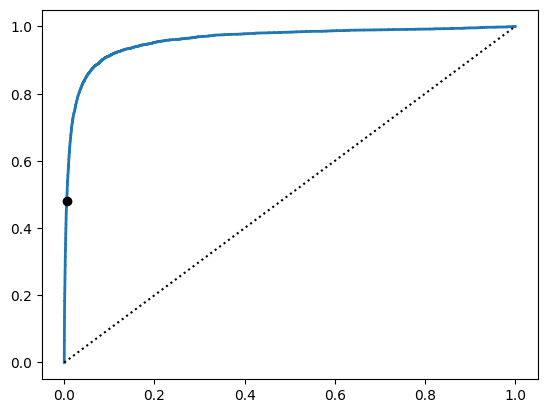

In [36]:
idx_for_threshold_at_90 = (thresholds <= threshold_for_90_precision).argmax()
tpr_90, fpr_90 = tpr[idx_for_threshold_at_90], fpr[idx_for_threshold_at_90]
plt.plot(fpr, tpr, linewidth=2, label="ROC curve")
plt.plot([0, 1], [0, 1], 'k:', label="Random classifier's ROC curve")
plt.plot([fpr_90], [tpr_90], "ko", label="Threshold for 90% precision")
[...] # beautify the figure: add labels, grid, legend, arrow, and text
plt.show()

In [37]:
# limear para 90% de precisão
threshold_for_90_precision

3370.0194991439557

- Observe que quanto maior a sensibilidade (*recall*) maior a *FPR* o classificador produz. 
- A linha pontilhada representa a curva *ROC* de um classificador puramente aleatório, em bom classificador fica o mais distânte dessa linha quanto possivel (na direção do canto superior esquerdo). 
- Uma forma de compara o classificador é medindo a *area under the curve* (AUC). Um classificador perfecto terá a ROC AUC igual a $1$, enquanto um classificador puramente aleatório terá um AUC ROC igual a 0.5. Para estimar, a AUC RUC se pode fazer: 

In [38]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5, y_scores)

0.9604938554008616

- O classificador esta apresentado um área sob a curva ROC de $96.05 \%$.
- Como a curva *ROC* é tão semelhante à curva de precisão/recall (PR), você pode se perguntar como decidir qual usar. Como regra geral, você deve preferir a curva PR sempre que a classe positiva é rara ou quando você se preocupa mais com os falsos positivos do que com os falsos negativos. Caso contrário, use a curva ROC. Por exemplo, olhando para a curva ROC anterior (e a pontuação ROC AUC), você pode pensar que o classificador é realmente bom. Mas isso é principalmente porque há poucos pontos positivos (5s) em comparação com os negativos (não-5s). Em por outro lado, a curva PR deixa claro que o classificador tem espaço para melhorias: o a curva poderia realmente estar mais próxima do canto superior direito (consulte a Figura 3-6 novamente).
- Agora você sabe como treinar classificadores binários, escolher a métrica adequada para sua tarefa, avaliar seus classificadores usando validação cruzada, selecionar o equilíbrio entre precisão e recall que atenda às suas necessidades e usar várias métricas e curvas para comparar vários modelos. Você está pronto para tentar detectar mais do que apenas os 5s.

## Muito obrigado por estar comigo

### Oscar J. O. Ayala